<a href="https://colab.research.google.com/github/feropiso/mat_computacional/blob/main/atividade_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: Fernando Rodrigo Pinheiro de Sousa

A) Plotar gráficos e achar a reta, calcular p-value, covariância e interpretação dos resultados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from scipy.stats import linregress, ttest_ind
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

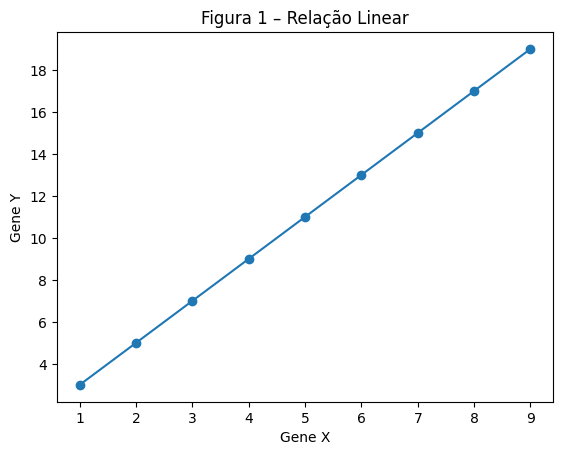

FIGURA 1
Slope: 2.0
Intercept: 1.0
p-value: 3.292585384803146e-70
Covariância: 15.0


In [ ]:
# =====================================
# FIGURA 1 – Relação linear (9 pontos)
# =====================================
x1 = np.arange(1, 10)
y1 = 2 * x1 + 1

# Regressão linear
reg1 = linregress(x1, y1)

# Covariância
cov1 = np.cov(x1, y1)[0, 1]

# Plot
plt.figure()
plt.scatter(x1, y1)
plt.plot(x1, reg1.intercept + reg1.slope * x1)
plt.xlabel("Gene X")
plt.ylabel("Gene Y")
plt.title("Figura 1 – Relação Linear")
plt.show()

print("FIGURA 1")
print("Slope:", reg1.slope)
print("Intercept:", reg1.intercept)
print("p-value:", reg1.pvalue)
print("Covariância:", cov1)

Existe uma forte relação linear positiva entre Gene X e Gene Y.
O p-value praticamente zero indica que a probabilidade dessa relação ter ocorrido por acaso é desprezível.
A covariância positiva e alta confirma que, quando Gene X aumenta, Gene Y também aumenta de forma consistente.

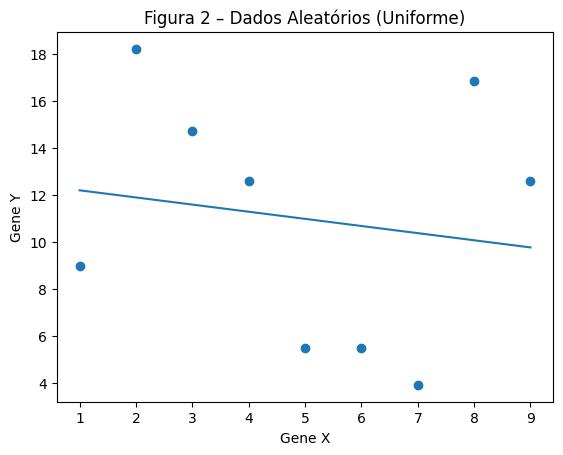


FIGURA 2
Slope: -0.30341320892501417
Intercept: 12.505145656590766
p-value: 0.6837613150481094
Covariância: -2.2755990669376063


In [ ]:
# =====================================
# FIGURA 2 – Dados aleatórios uniformes
# =====================================
np.random.seed(42)

x2 = np.linspace(x1.min(), x1.max(), 9)
y2 = np.random.uniform(y1.min(), y1.max(), 9)

# Regressão linear
reg2 = linregress(x2, y2)

# Covariância
cov2 = np.cov(x2, y2)[0, 1]

# Plot
plt.figure()
plt.scatter(x2, y2)
plt.plot(x2, reg2.intercept + reg2.slope * x2)
plt.xlabel("Gene X")
plt.ylabel("Gene Y")
plt.title("Figura 2 – Dados Aleatórios (Uniforme)")
plt.show()

print("\nFIGURA 2")
print("Slope:", reg2.slope)
print("Intercept:", reg2.intercept)
print("p-value:", reg2.pvalue)
print("Covariância:", cov2)

Não há evidência estatística de relação linear entre Gene X e Gene Y.
O p-value maior que 0,5 indica que a inclinação observada pode facilmente ter ocorrido por acaso.
A covariância é próxima de zero (negativa), indicando ausência de dependência linear significativa.

B) Obtendo dados amostrais (notas escolares), calcular o intervalo de confiança e interpretação.

Média da amostra: 7.15
Desvio padrão amostral: 0.72
Intervalo de confiança 90%: (np.float64(6.828169818901328), np.float64(7.478496847765339))
Intervalo de confiança 95%: (np.float64(6.757374459887552), np.float64(7.549292206779115))
Intervalo de confiança 99%: (np.float64(6.6037647901457), np.float64(7.702901876520967))


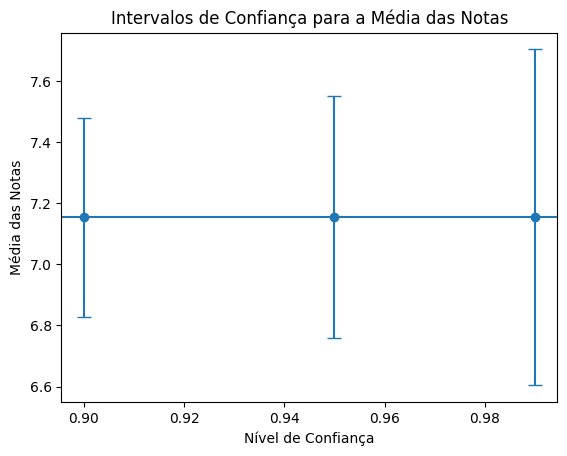

In [ ]:
# ---------------------------------
# 1. Conjunto de dados amostrais
# ---------------------------------

# Notas de testes (amostra)
notas = np.array([
    6.5, 7.0, 8.2, 5.9, 6.8,
    7.5, 8.0, 6.2, 7.1, 7.8,
    6.9, 7.3, 8.1, 6.4, 7.6
])

# ---------------------------------
# 2. Média e desvio padrão da amostra
# ---------------------------------
media = np.mean(notas)
desvio_padrao = np.std(notas, ddof=1)  # desvio padrão amostral
n = len(notas)

print(f"Média da amostra: {media:.2f}")
print(f"Desvio padrão amostral: {desvio_padrao:.2f}")

# ---------------------------------
# 3. Intervalos de confiança
# ---------------------------------
niveis_confianca = [0.90, 0.95, 0.99]
intervalos = []

for nc in niveis_confianca:
    ic = stats.t.interval(
        confidence=nc,
        df=n - 1,
        loc=media,
        scale=desvio_padrao / np.sqrt(n)
    )
    intervalos.append(ic)
    print(f"Intervalo de confiança {int(nc*100)}%: {ic}")

# ---------------------------------
# 4. Visualização dos intervalos
# ---------------------------------
centros = [media] * len(intervalos)
erro_inferior = [media - ic[0] for ic in intervalos]
erro_superior = [ic[1] - media for ic in intervalos]

plt.figure()
plt.errorbar(
    niveis_confianca,
    centros,
    yerr=[erro_inferior, erro_superior],
    fmt='o',
    capsize=5
)
plt.axhline(media)
plt.xlabel("Nível de Confiança")
plt.ylabel("Média das Notas")
plt.title("Intervalos de Confiança para a Média das Notas")
plt.show()

A média representa a estimativa pontual da nota média do espaço amostral.

À medida que o nível de confiança aumenta (90% → 99%), o intervalo fica mais largo, indicando maior incerteza para garantir mais confiança.

O gráfico evidencia visualmente essa variabilidade, mostrando como intervalos mais confiáveis são menos precisos.

C)

In [2]:
# -----------------------------
# 1. Conjuntos de dados
# -----------------------------
# Grupo de controle (ex: notas antes de uma intervenção)
grupo_controle = np.array([70, 72, 68, 75, 71, 69, 73, 74])

# Grupo de teste (ex: notas após uma intervenção)
grupo_teste = np.array([78, 80, 77, 79, 76, 81, 82, 78])

# -----------------------------
# 2. Hipótese nula
# -----------------------------
# H0: A média do grupo de controle é igual à média do grupo de teste
# H1: As médias são diferentes

# -----------------------------
# 3. Teste t de duas amostras
# -----------------------------
statistica_t, p_value = ttest_ind(grupo_controle, grupo_teste)

# -----------------------------
# 4. Interpretação do p-value
# -----------------------------
nivel_significancia = 0.05

print(f"Estatística t: {statistica_t:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < nivel_significancia:
    print("Conclusão: Rejeitamos a hipótese nula (há diferença significativa entre as médias).")
else:
    print("Conclusão: Não rejeitamos a hipótese nula (não há diferença significativa entre as médias).")


Estatística t: -6.5556
p-value: 0.0000
Conclusão: Rejeitamos a hipótese nula (há diferença significativa entre as médias).


E) Reproduzido em código python o slides de 24 a 46.

ESTIMATIVA DA MÉDIA POPULACIONAL
Amostra (n = 15 mulheres):
  Taxas de batimentos: [72 68 75 70 74 65 71 69 73 67 72 70 76 68 74]

Estatísticas:
  Média (x̄) = 70.93 bpm
  Desvio padrão (s) = 3.17 bpm

Intervalo de confiança 95% para μ:
  Fórmula: x̄ ± t*(s/√n)
  t(14 graus de liberdade, 95%) = 2.145
  Margem de erro = 2.145 × (3.17/√15) = 1.76 bpm
  Intervalo: 70.93 ± 1.76 bpm
  [69.18, 72.69] bpm

ESTIMATIVA DA PROPORÇÃO POPULACIONAL

Para n = 50:
  Proporção amostral (p) = 0.120 (12.0%)
  Número com taxa ≥ 100 bpm: 6 de 50
  Fórmula: p ± z*√[p(1-p)/n]
  z(95%) = 1.960
  Margem de erro = 1.960 × √[0.120×(1-0.120)/50] = 0.090
  Intervalo de confiança: [0.030, 0.210]

Para n = 100:
  Proporção amostral (p) = 0.130 (13.0%)
  Número com taxa ≥ 100 bpm: 13 de 100
  Fórmula: p ± z*√[p(1-p)/n]
  z(95%) = 1.960
  Margem de erro = 1.960 × √[0.130×(1-0.130)/100] = 0.066
  Intervalo de confiança: [0.064, 0.196]

Para n = 200:
  Proporção amostral (p) = 0.155 (15.5%)
  Número com taxa ≥ 100 bpm:

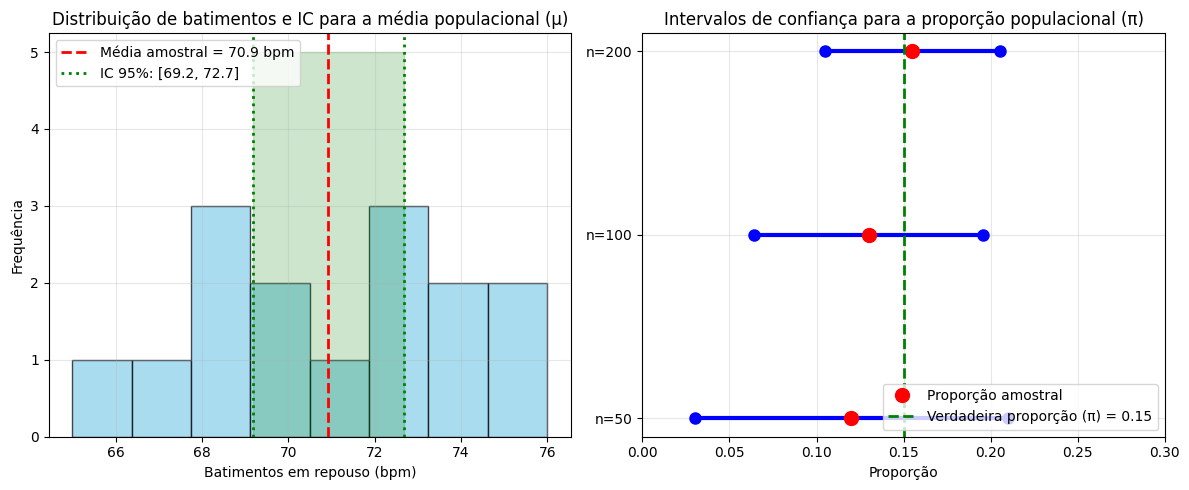


INTERPRETAÇÃO DOS RESULTADOS

1. PARA A MÉDIA POPULACIONAL (μ):
   • A média amostral de 70.9 bpm        é nossa melhor estimativa pontual para μ
   • Com 95% de confiança, a verdadeira média populacional μ está entre 69.2 e 72.7 bpm
   • A fórmula x̄ ± t*(s/√n) considera:
     - x̄: média amostral (centro do intervalo)
     - t: valor crítico da distribuição t de Student
     - s/√n: erro padrão da média
   • Usamos a distribuição t porque σ (desvio padrão populacional) é desconhecido

2. PARA A PROPORÇÃO POPULACIONAL (π):
   • A proporção amostral p é nossa estimativa pontual para π
   • A fórmula p ± z*√[p(1-p)/n] considera:
     - p: proporção amostral
     - z: valor crítico da distribuição normal padrão
     - √[p(1-p)/n]: erro padrão da proporção
   • A aproximação normal é válida quando np ≥ 10 e n(1-p) ≥ 10
   • Observamos que intervalos com maior n são mais estreitos (mais precisos)

3. DIFERENÇAS ENTRE AS ABORDAGENS:
   • Para μ: usa distribuição t (para n pequeno ou σ desc

In [ ]:
# ===========================================
# 1. ESTIMATIVA DA MÉDIA POPULACIONAL (μ)
# ===========================================

print("="*60)
print("ESTIMATIVA DA MÉDIA POPULACIONAL")
print("="*60)

# Dados de exemplo: taxas de batimentos em repouso (bpm) para mulheres
batimentos = np.array([72, 68, 75, 70, 74, 65, 71, 69, 73, 67, 72, 70, 76, 68, 74])
n = len(batimentos)
x_bar = np.mean(batimentos)  # média amostral
s = np.std(batimentos, ddof=1)  # desvio padrão amostral

# Intervalo de confiança para a média populacional (95% de confiança)
nivel_confianca = 0.95
t_valor = stats.t.ppf((1 + nivel_confianca) / 2, df=n-1)
margem_de_erro = t_valor * (s / np.sqrt(n))
limite_inferior = x_bar - margem_de_erro
limite_superior = x_bar + margem_de_erro

print(f"Amostra (n = {n} mulheres):")
print(f"  Taxas de batimentos: {batimentos}")
print(f"\nEstatísticas:")
print(f"  Média (x̄) = {x_bar:.2f} bpm")
print(f"  Desvio padrão (s) = {s:.2f} bpm")
print(f"\nIntervalo de confiança {nivel_confianca*100:.0f}% para μ:")
print(f"  Fórmula: x̄ ± t*(s/√n)")
print(f"  t({n-1} graus de liberdade, {nivel_confianca*100:.0f}%) = {t_valor:.3f}")
print(f"  Margem de erro = {t_valor:.3f} × ({s:.2f}/√{n}) = {margem_de_erro:.2f} bpm")
print(f"  Intervalo: {x_bar:.2f} ± {margem_de_erro:.2f} bpm")
print(f"  [{limite_inferior:.2f}, {limite_superior:.2f}] bpm")

# ===========================================
# 2. ESTIMATIVA DA PROPORÇÃO POPULACIONAL (π)
# ===========================================

print("\n" + "="*60)
print("ESTIMATIVA DA PROPORÇÃO POPULACIONAL")
print("="*60)

# Proporção amostral: mulheres com batimentos ≥ 100 bpm
valor_limite_batimentos = 100
# Para este exemplo, simulamos dados diferentes para melhor visualização
tamanhos_de_amostras = [50, 100, 200]  # diferentes tamanhos de amostras

for n_prop in tamanhos_de_amostras:
    # Simulação: gerar dados binários (1 = taxa ≥ 100 bpm, 0 = caso contrário)
    np.random.seed(42)  # para reprodutibilidade
    p_true = 0.15  # chute inicial para a porporção real
    amostra = np.random.binomial(1, p_true, n_prop)

    p = np.mean(amostra)  # proporção amostral
    z_valor = stats.norm.ppf((1 + nivel_confianca) / 2)

    # Intervalo de confiança para proporção (aproximação normal)
    margem_de_erro_prop = z_valor * np.sqrt(p * (1 - p) / n_prop)
    limite_inferior_prop = max(0, p - margem_de_erro_prop)  # não pode ser negativo
    limite_superior_prop = min(1, p + margem_de_erro_prop)  # não pode exceder 1

    print(f"\nPara n = {n_prop}:")
    print(f"  Proporção amostral (p) = {p:.3f} ({p*100:.1f}%)")
    print(f"  Número com taxa ≥ {valor_limite_batimentos} bpm: {int(p * n_prop)} de {n_prop}")
    print(f"  Fórmula: p ± z*√[p(1-p)/n]")
    print(f"  z({nivel_confianca*100:.0f}%) = {z_valor:.3f}")
    print(f"  Margem de erro = {z_valor:.3f} × √[{p:.3f}×(1-{p:.3f})/{n_prop}] = {margem_de_erro_prop:.3f}")
    print(f"  Intervalo de confiança: [{limite_inferior_prop:.3f}, {limite_superior_prop:.3f}]")

# ===========================================
# 3. VISUALIZAÇÃO GRÁFICA
# ===========================================

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Distribuição de batimentos e IC para a média
axes[0].hist(batimentos, bins=8, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].axvline(x=x_bar, color='red', linestyle='--', linewidth=2, label=f'Média amostral = {x_bar:.1f} bpm')
axes[0].axvline(x=limite_inferior, color='green', linestyle=':', linewidth=2, label=f'IC 95%: [{limite_inferior:.1f}, {limite_superior:.1f}]')
axes[0].axvline(x=limite_superior, color='green', linestyle=':', linewidth=2)
axes[0].fill_betweenx([0, 5], limite_inferior, limite_superior, alpha=0.2, color='green')
axes[0].set_xlabel('Batimentos em repouso (bpm)')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição de batimentos e IC para a média populacional (μ)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Intervalos de confiança para diferentes tamanhos amostrais
amostra_labels = [f'n={n}' for n in tamanhos_de_amostras]
limite_inferior_list = []
limite_superior_list = []
p_list = []

for n_prop in tamanhos_de_amostras:
    np.random.seed(42)
    amostra = np.random.binomial(1, p_true, n_prop)
    p = np.mean(amostra)
    z_valor = stats.norm.ppf((1 + nivel_confianca) / 2)
    margin = z_valor * np.sqrt(p * (1 - p) / n_prop)

    p_list.append(p)
    limite_inferior_list.append(max(0, p - margin))
    limite_superior_list.append(min(1, p + margin))

# Plot dos intervalos de confiança
for i, (n_prop, p_val, ci_low, ci_up) in enumerate(zip(tamanhos_de_amostras, p_list, limite_inferior_list, limite_superior_list)):
    axes[1].plot([ci_low, ci_up], [i, i], 'o-', color='blue', linewidth=3, markersize=8)
    axes[1].plot(p_val, i, 'ro', markersize=10, label='Proporção amostral' if i == 0 else "")

axes[1].axvline(x=p_true, color='green', linestyle='--', linewidth=2, label=f'Verdadeira proporção (π) = {p_true:.2f}')
axes[1].set_yticks(range(len(tamanhos_de_amostras)))
axes[1].set_yticklabels(amostra_labels)
axes[1].set_xlabel('Proporção')
axes[1].set_title('Intervalos de confiança para a proporção populacional (π)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, 0.3)

plt.tight_layout()
plt.show()

# ===========================================
# 4. INTERPRETAÇÃO
# ===========================================

print("\n" + "="*60)
print("INTERPRETAÇÃO DOS RESULTADOS")
print("="*60)

print("\n1. PARA A MÉDIA POPULACIONAL (μ):")
print("   • A média amostral de " + f"{x_bar:.1f} bpm".ljust(15) + " é nossa melhor estimativa pontual para μ")
print("   • Com 95% de confiança, a verdadeira média populacional μ está entre " +
      f"{limite_inferior:.1f} e {limite_superior:.1f} bpm")
print("   • A fórmula x̄ ± t*(s/√n) considera:")
print("     - x̄: média amostral (centro do intervalo)")
print("     - t: valor crítico da distribuição t de Student")
print("     - s/√n: erro padrão da média")
print("   • Usamos a distribuição t porque σ (desvio padrão populacional) é desconhecido")

print("\n2. PARA A PROPORÇÃO POPULACIONAL (π):")
print("   • A proporção amostral p é nossa estimativa pontual para π")
print("   • A fórmula p ± z*√[p(1-p)/n] considera:")
print("     - p: proporção amostral")
print("     - z: valor crítico da distribuição normal padrão")
print("     - √[p(1-p)/n]: erro padrão da proporção")
print("   • A aproximação normal é válida quando np ≥ 10 e n(1-p) ≥ 10")
print("   • Observamos que intervalos com maior n são mais estreitos (mais precisos)")

print("\n3. DIFERENÇAS ENTRE AS ABORDAGENS:")
print("   • Para μ: usa distribuição t (para n pequeno ou σ desconhecido)")
print("   • Para π: usa distribuição normal (aproximação para proporções)")
print("   • Ambas fornecem estimativas intervalares com nível de confiança especificado")
print("   • O tamanho amostral (n) afeta diretamente a precisão de ambos os intervalos")

F)


DADOS EXEMPLO (Mouse size vs Mouse weight):
 Mouse size  Mouse weight
          1           0.9
          2           1.7
          3           2.5
          4           3.2
          5           4.1
          6           4.9
          7           5.6
          8           6.4
          9           7.3
         10           8.1

REGRESSÃO LINEAR COM SCIKIT-LEARN

Equação da linha de regressão:
y = 0.0867 + 0.7970x

Intercepto (y-axis intercept): 0.0867
Slope (inclinação): 0.7970

ANÁLISE ESTATÍSTICA COM STATSMODELS

----------------------------------------
RESUMO ESTATÍSTICO DA REGRESSÃO
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:           Mouse weight   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.071e+04
Date:                Fri, 30 Jan 2026   Prob (F

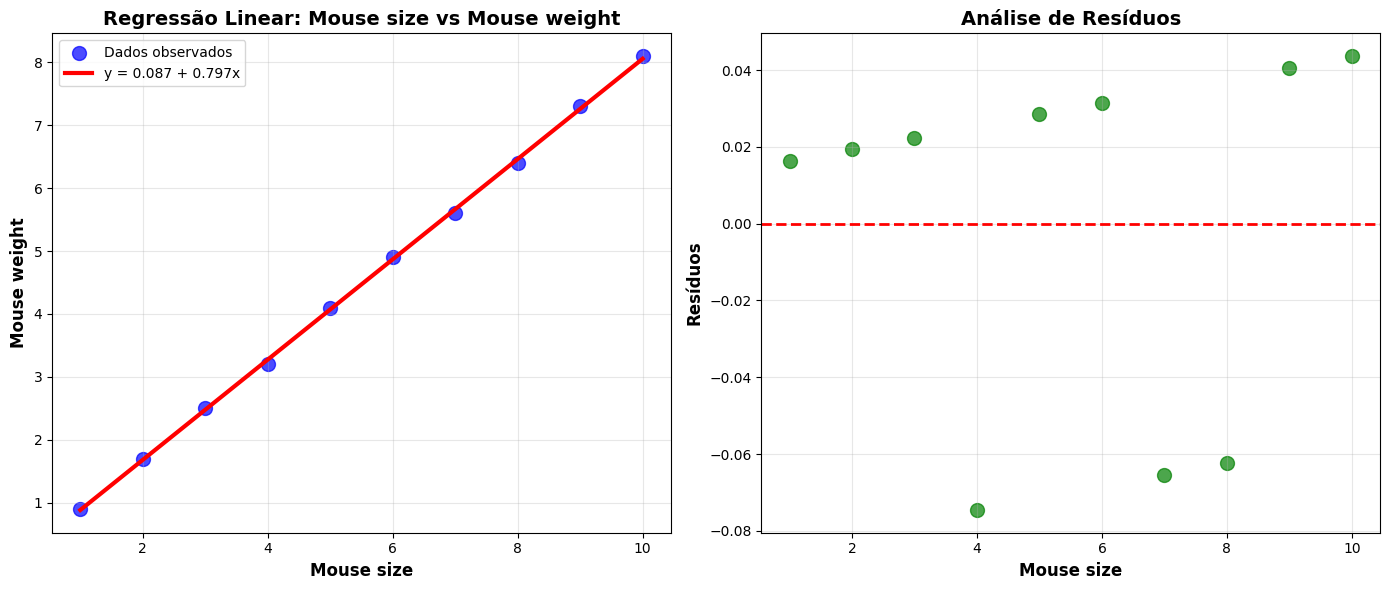


PREVISÕES COM O MODELO TREINADO
Mouse size = 2.5 → Mouse weight previsto = 2.079
Mouse size = 5.5 → Mouse weight previsto = 4.470
Mouse size = 8.5 → Mouse weight previsto = 6.861

CONCLUSÃO
✓ Modelo de regressão linear ajustado com sucesso!
✓ Equação: y = intercepto + slope * x
✓ A cada aumento de 1 unidade em 'Mouse size', 
  'Mouse weight' aumenta em 0.7970 unidades
✓ O modelo explica 99.96% da variância nos dados


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:

# Criando dados de exemplo similares à imagem
np.random.seed(42)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([0.9, 1.7, 2.5, 3.2, 4.1, 4.9, 5.6, 6.4, 7.3, 8.1])

# Criando DataFrame
df = pd.DataFrame({'Mouse size': x, 'Mouse weight': y})

print("\n" + "=" * 60)
print("DADOS EXEMPLO (Mouse size vs Mouse weight):")
print("=" * 60)
print(df.to_string(index=False))

# ============================================================
# 1. REGRESSÃO LINEAR COM SCIKIT-LEARN
# ============================================================

print("\n" + "=" * 60)
print("REGRESSÃO LINEAR COM SCIKIT-LEARN")
print("=" * 60)

# Preparando os dados
X = df[['Mouse size']]
y = df['Mouse weight']

# Criando e treinando o modelo
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Coeficientes
intercept = model_sklearn.intercept_
slope = model_sklearn.coef_[0]

print(f"\nEquação da linha de regressão:")
print(f"y = {intercept:.4f} + {slope:.4f}x")
print(f"\nIntercepto (y-axis intercept): {intercept:.4f}")
print(f"Slope (inclinação): {slope:.4f}")

# Previsões
y_pred = model_sklearn.predict(X)

# ============================================================
# 2. ANÁLISE ESTATÍSTICA COM STATSMODELS
# ============================================================

print("\n" + "=" * 60)
print("ANÁLISE ESTATÍSTICA COM STATSMODELS")
print("=" * 60)

# Adicionando constante para o intercepto
X_sm = sm.add_constant(X)

# Criando e ajustando o modelo
model_sm = sm.OLS(y, X_sm)
results = model_sm.fit()

print("\n" + "-" * 40)
print("RESUMO ESTATÍSTICO DA REGRESSÃO")
print("-" * 40)
print(results.summary())

# Extraindo estatísticas importantes
print("\n" + "-" * 40)
print("ESTATÍSTICAS PRINCIPAIS")
print("-" * 40)
print(f"R² (coeficiente de determinação): {results.rsquared:.4f}")
print(f"R² ajustado: {results.rsquared_adj:.4f}")
print(f"F-statistic: {results.fvalue:.4f}")
print(f"Prob (F-statistic): {results.f_pvalue:.4f}")
print(f"AIC: {results.aic:.4f}")
print(f"BIC: {results.bic:.4f}")

print("\n" + "-" * 40)
print("COEFICIENTES E SIGNIFICÂNCIA")
print("-" * 40)
coef_summary = pd.DataFrame({
    'Coeficiente': results.params,
    'Erro Padrão': results.bse,
    't-valor': results.tvalues,
    'P>|t|': results.pvalues
})
print(coef_summary.to_string())

# ============================================================
# 3. VISUALIZAÇÃO DOS RESULTADOS
# ============================================================

print("\n" + "=" * 60)
print("VISUALIZAÇÃO DOS RESULTADOS")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Dados e linha de regressão
axes[0].scatter(x, y, color='blue', s=100, alpha=0.7, label='Dados observados')
axes[0].plot(x, y_pred, color='red', linewidth=3, label=f'y = {intercept:.3f} + {slope:.3f}x')
axes[0].set_xlabel('Mouse size', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Mouse weight', fontsize=12, fontweight='bold')
axes[0].set_title('Regressão Linear: Mouse size vs Mouse weight', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Resíduos
residuals = y - y_pred
axes[1].scatter(x, residuals, color='green', s=100, alpha=0.7)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Mouse size', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Resíduos', fontsize=12, fontweight='bold')
axes[1].set_title('Análise de Resíduos', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# 4. PREVISÕES COM O MODELO
# ============================================================

print("\n" + "=" * 60)
print("PREVISÕES COM O MODELO TREINADO")
print("=" * 60)

# Valores para previsão
new_sizes = np.array([[2.5], [5.5], [8.5]])
predictions = model_sklearn.predict(new_sizes)

for size, pred in zip(new_sizes.flatten(), predictions):
    print(f"Mouse size = {size:.1f} → Mouse weight previsto = {pred:.3f}")

print("\n" + "=" * 60)
print("CONCLUSÃO")
print("=" * 60)
print("✓ Modelo de regressão linear ajustado com sucesso!")
print("✓ Equação: y = intercepto + slope * x")
print(f"✓ A cada aumento de 1 unidade em 'Mouse size', ")
print(f"  'Mouse weight' aumenta em {slope:.4f} unidades")
print(f"✓ O modelo explica {results.rsquared*100:.2f}% da variância nos dados")
print("=" * 60)


1. REGRESSÃO LINEAR COM SCIKIT-LEARN (MELHOR MODELO)

Coeficientes ótimos encontrados pelo scikit-learn:
a (slope) ótimo: 0.7970
b (intercept) ótimo: 0.0867
Equação ótima: y = 0.0867 + 0.7970 * x

Métricas do modelo ótimo:
R² (coeficiente de determinação): 0.9996
Sum of Squared Residuals (SSR): 0.0202

2. TESTANDO 6 DIFERENTES VALORES DE 'a'

Valor de b fixo (intercepto): 0.0867

Testando diferentes valores de 'a':
--------------------------------------------------

Teste 1: a = 0.3970
  Equação: y = 0.0867 + 0.3970 * x
  R²: -0.1755
  SSR (Sum of Squared Residuals): 61.6202
  MSE: 6.1620

Teste 2: a = 0.5570
  Equação: y = 0.0867 + 0.5570 * x
  R²: 0.5766
  SSR (Sum of Squared Residuals): 22.1962
  MSE: 2.2196

Teste 3: a = 0.7170
  Equação: y = 0.0867 + 0.7170 * x
  R²: 0.9526
  SSR (Sum of Squared Residuals): 2.4842
  MSE: 0.2484

Teste 4: a = 0.8770
  Equação: y = 0.0867 + 0.8770 * x
  R²: 0.9526
  SSR (Sum of Squared Residuals): 2.4842
  MSE: 0.2484

Teste 5: a = 1.0370
  Equação

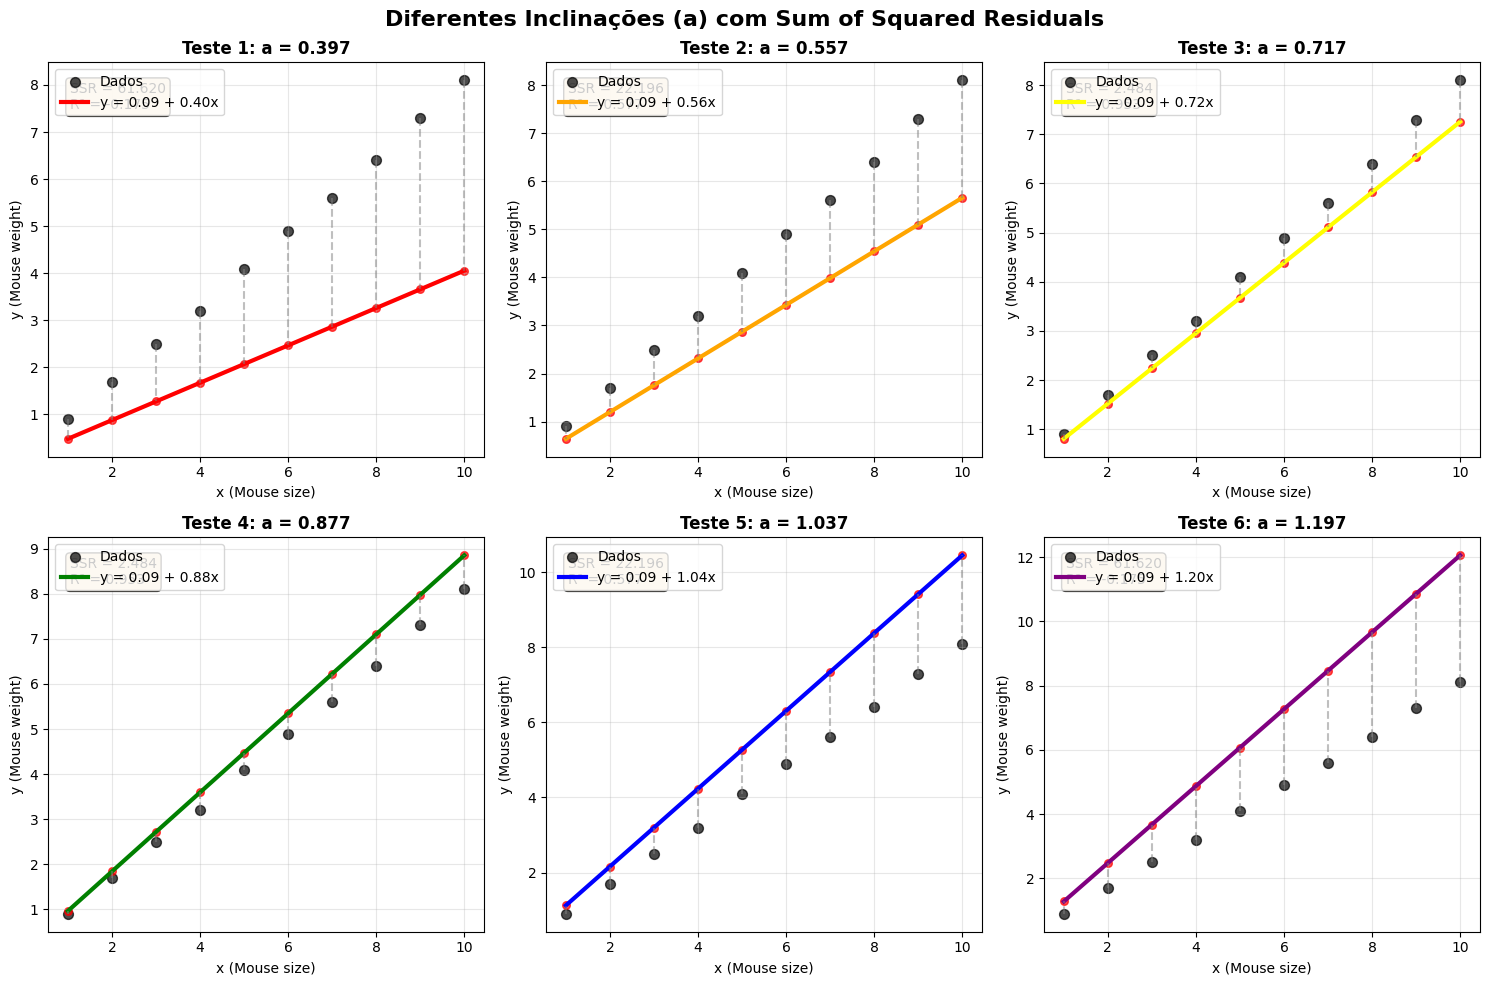

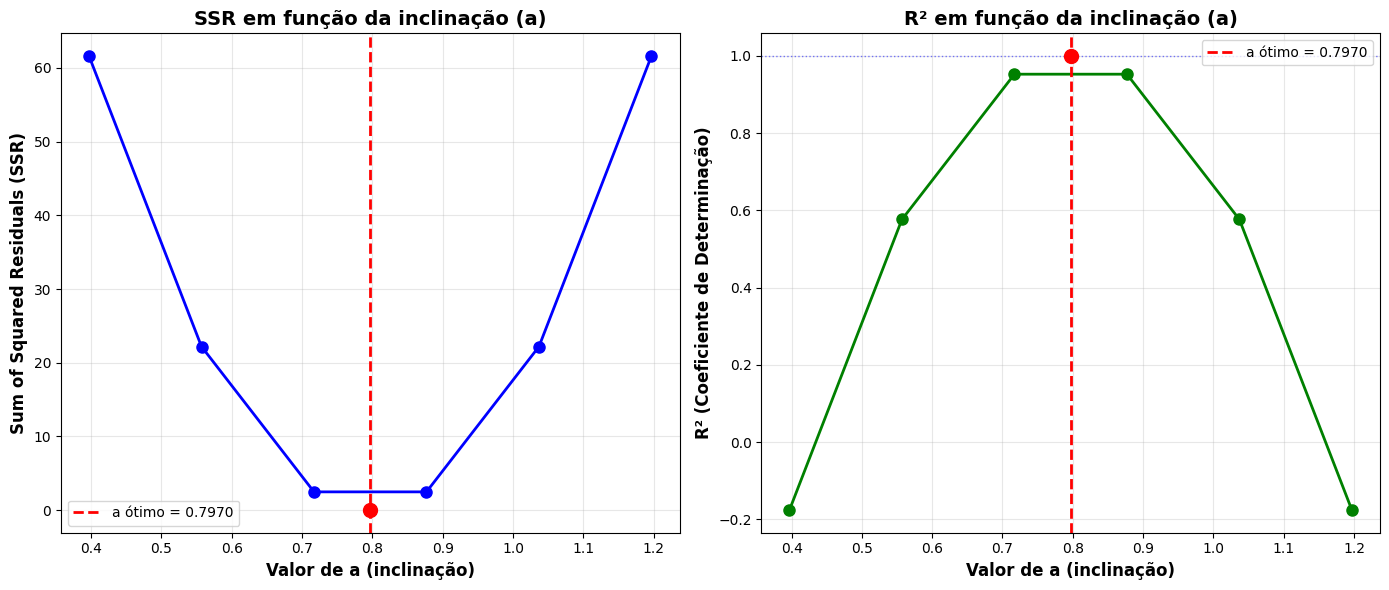

In [ ]:
# Criando dados de exemplo similares à imagem
np.random.seed(42)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([0.9, 1.7, 2.5, 3.2, 4.1, 4.9, 5.6, 6.4, 7.3, 8.1])

# Criando DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# ============================================================
# 1. REGRESSÃO LINEAR COM SCIKIT-LEARN (MELHOR MODELO)
# ============================================================

print("\n" + "=" * 60)
print("1. REGRESSÃO LINEAR COM SCIKIT-LEARN (MELHOR MODELO)")
print("=" * 60)

X = df[['x']]
y = df['y']

model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

# Coeficientes ótimos
a_optimal = model_sklearn.coef_[0]
b_optimal = model_sklearn.intercept_

print(f"\nCoeficientes ótimos encontrados pelo scikit-learn:")
print(f"a (slope) ótimo: {a_optimal:.4f}")
print(f"b (intercept) ótimo: {b_optimal:.4f}")
print(f"Equação ótima: y = {b_optimal:.4f} + {a_optimal:.4f} * x")

# Previsões com o modelo ótimo
y_pred_optimal = model_sklearn.predict(X)
r2_optimal = r2_score(y, y_pred_optimal)
ssr_optimal = np.sum((y - y_pred_optimal) ** 2)

print(f"\nMétricas do modelo ótimo:")
print(f"R² (coeficiente de determinação): {r2_optimal:.4f}")
print(f"Sum of Squared Residuals (SSR): {ssr_optimal:.4f}")

# ============================================================
# 2. TESTANDO 6 DIFERENTES VALORES DE 'a'
# ============================================================

print("\n" + "=" * 60)
print("2. TESTANDO 6 DIFERENTES VALORES DE 'a'")
print("=" * 60)

# Definindo 6 diferentes valores de 'a' (inclinações) para testar
# Mantendo o 'b' fixo como o obtido pelo scikit-learn
a_values = np.linspace(a_optimal - 0.4, a_optimal + 0.4, 6)

# Armazenando resultados
results = []

print(f"\nValor de b fixo (intercepto): {b_optimal:.4f}")
print("\nTestando diferentes valores de 'a':")
print("-" * 50)

for i, a in enumerate(a_values):
    # Calculando previsões com a e b fixos
    y_pred = b_optimal + a * x

    # Calculando métricas
    r2 = r2_score(y, y_pred)
    ssr = np.sum((y - y_pred) ** 2)
    mse = mean_squared_error(y, y_pred)

    results.append({
        'a': a,
        'b': b_optimal,
        'r2': r2,
        'ssr': ssr,
        'mse': mse
    })

    print(f"\nTeste {i+1}: a = {a:.4f}")
    print(f"  Equação: y = {b_optimal:.4f} + {a:.4f} * x")
    print(f"  R²: {r2:.4f}")
    print(f"  SSR (Sum of Squared Residuals): {ssr:.4f}")
    print(f"  MSE: {mse:.4f}")

# Convertendo para DataFrame
results_df = pd.DataFrame(results)
print("\n" + "=" * 60)
print("RESUMO DAS 6 DIFERENTES INCLINAÇÕES")
print("=" * 60)
print(results_df.to_string(index=False))

# ============================================================
# 3. VISUALIZAÇÃO DOS RESULTADOS
# ============================================================

print("\n" + "=" * 60)
print("3. VISUALIZAÇÃO DOS RESULTADOS")
print("=" * 60)

# Criando figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Diferentes Inclinações (a) com Sum of Squared Residuals', fontsize=16, fontweight='bold')

# Cores para as diferentes linhas
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

# Plotando cada uma das 6 diferentes inclinações
for idx, (ax, result, color) in enumerate(zip(axes.flatten(), results, colors)):
    a = result['a']
    b = result['b']
    ssr = result['ssr']

    # Calculando a linha para este valor de a
    y_line = b + a * x

    # Plotando dados e linha de regressão
    ax.scatter(x, y, color='black', s=50, alpha=0.7, label='Dados')
    ax.plot(x, y_line, color=color, linewidth=3, label=f'y = {b:.2f} + {a:.2f}x')

    # Calculando e plotando resíduos
    residuals = y - y_line
    for xi, yi, ri in zip(x, y, residuals):
        ax.plot([xi, xi], [yi, yi - ri], color='gray', linestyle='--', alpha=0.5)
        ax.scatter(xi, yi - ri, color='red', s=30, alpha=0.7)

    # Configurações do gráfico
    ax.set_title(f'Teste {idx+1}: a = {a:.3f}', fontweight='bold')
    ax.set_xlabel('x (Mouse size)', fontsize=10)
    ax.set_ylabel('y (Mouse weight)', fontsize=10)
    ax.text(0.05, 0.95, f'SSR = {ssr:.3f}\nR² = {result["r2"]:.3f}',
            transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)

plt.tight_layout()

# ============================================================
# 4. GRÁFICO DE COMPARAÇÃO: SSR vs VALOR DE 'a'
# ============================================================

fig2, axes2 = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: SSR em função de 'a'
axes2[0].plot(results_df['a'], results_df['ssr'], 'bo-', linewidth=2, markersize=8)
axes2[0].axvline(x=a_optimal, color='red', linestyle='--', linewidth=2,
                 label=f'a ótimo = {a_optimal:.4f}')
axes2[0].scatter(a_optimal, ssr_optimal, color='red', s=100, zorder=5)
axes2[0].set_xlabel('Valor de a (inclinação)', fontsize=12, fontweight='bold')
axes2[0].set_ylabel('Sum of Squared Residuals (SSR)', fontsize=12, fontweight='bold')
axes2[0].set_title('SSR em função da inclinação (a)', fontsize=14, fontweight='bold')
axes2[0].legend()
axes2[0].grid(True, alpha=0.3)

# Gráfico 2: R² em função de 'a'
axes2[1].plot(results_df['a'], results_df['r2'], 'go-', linewidth=2, markersize=8)
axes2[1].axvline(x=a_optimal, color='red', linestyle='--', linewidth=2,
                 label=f'a ótimo = {a_optimal:.4f}')
axes2[1].scatter(a_optimal, r2_optimal, color='red', s=100, zorder=5)
axes2[1].axhline(y=r2_optimal, color='blue', linestyle=':', linewidth=1, alpha=0.5)
axes2[1].set_xlabel('Valor de a (inclinação)', fontsize=12, fontweight='bold')
axes2[1].set_ylabel('R² (Coeficiente de Determinação)', fontsize=12, fontweight='bold')
axes2[1].set_title('R² em função da inclinação (a)', fontsize=14, fontweight='bold')
axes2[1].legend()
axes2[1].grid(True, alpha=0.3)

plt.tight_layout()

# ============================================================
# 5. TABELA COMPARATIVA
# ============================================================

print("\n" + "=" * 60)
print("5. TABELA COMPARATIVA: DIFERENTES 'a' vs MODELO ÓTIMO")
print("=" * 60)

# Criando tabela comparativa
comparison_df = results_df.copy()
comparison_df['diff_r2'] = comparison_df['r2'] - r2_optimal
comparison_df['diff_ssr'] = comparison_df['ssr'] - ssr_optimal
comparison_df['percent_diff_ssr'] = ((comparison_df['ssr'] - ssr_optimal) / ssr_optimal) * 100

print("\nComparação com o modelo ótimo (a = {:.4f}, R² = {:.4f}, SSR = {:.4f}):".format(
    a_optimal, r2_optimal, ssr_optimal))
print("-" * 90)
print(comparison_df.to_string(index=False))

# Encontrando o melhor entre os 6 testados
best_among_6 = comparison_df.loc[comparison_df['r2'].idxmax()]
worst_among_6 = comparison_df.loc[comparison_df['r2'].idxmin()]

print("\n" + "=" * 60)
print("CONCLUSÕES")
print("=" * 60)
print(f"\n1. Modelo ótimo (scikit-learn):")
print(f"   • a = {a_optimal:.4f}, R² = {r2_optimal:.4f}, SSR = {ssr_optimal:.4f}")

print(f"\n2. Melhor entre os 6 testados:")
print(f"   • a = {best_among_6['a']:.4f}, R² = {best_among_6['r2']:.4f}")
print(f"   • Diferença para ótimo: R² = {best_among_6['diff_r2']:.4f}")

print(f"\n3. Pior entre os 6 testados:")
print(f"   • a = {worst_among_6['a']:.4f}, R² = {worst_among_6['r2']:.4f}")
print(f"   • Diferença para ótimo: R² = {worst_among_6['diff_r2']:.4f}")

print(f"\n4. O algoritmo de mínimos quadrados encontra o valor de 'a' que:")
print(f"   • Minimiza a soma dos resíduos quadrados (SSR)")
print(f"   • Maximiza o R² (coeficiente de determinação)")

print(f"\n5. Observação:")
print(f"   • Quando a = {a_optimal:.4f}, temos o menor SSR possível")
print(f"   • Pequenas variações em 'a' aumentam significativamente o SSR")
print(f"   • O R² é máximo quando SSR é mínimo")

print("\n" + "=" * 60)
print("DEMONSTRAÇÃO DO PRINCÍPIO DOS MÍNIMOS QUADRADOS")
print("=" * 60)
print("\nO método dos mínimos quadrados encontra a inclinação 'a' que minimiza:")
print("SSR = Σ(yᵢ - ŷᵢ)² = Σ(yᵢ - (b + a·xᵢ))²")
print("\nDerivando SSR em relação a 'a' e igualando a zero:")
print("∂SSR/∂a = -2Σxᵢ(yᵢ - b - a·xᵢ) = 0")
print(f"\nSolução: a_ótimo = {a_optimal:.4f}")
print(f"Que resulta em SSR mínimo = {ssr_optimal:.4f}")

plt.show()

G)

In [ ]:

# Sistema do exemplo
A = np.array([[3.0, -4.0, 1.0],
              [1.0, 2.0, 2.0],
              [4.0, 0.0, -3.0]])

b = np.array([9.0, 3.0, -2.0])

n = A.shape[0]

# Inicializar matrizes
L = np.eye(n)  # Matriz identidade para L
U = A.copy()   # Cópia de A para U
P = np.eye(n)  # Matriz de permutação

print("\n1. MATRIZES INICIAIS:")
print("\nMatriz A (original):")
print(A)
print("\nVetor b (original):")
print(b)
print("\nMatriz identidade L (inicial):")
print(L)
print("\nMatriz identidade P (inicial):")
print(P)

print("\n" + "=" * 70)
print("2. PROCESSO DE FATORAÇÃO LU COM PIVOTEAMENTO PARCIAL")
print("=" * 70)

# Vetor para armazenar índices das permutações
permutation_tracker = list(range(n))

for k in range(n-1):
    print(f"\n{'='*60}")
    print(f"ETAPA {k+1}: Processando coluna {k}")
    print(f"{'='*60}")

    # Mostrar estado atual
    print(f"\nMatriz U antes do pivoteamento (etapa {k+1}):")
    print(U)

    # PIVOTEAMENTO PARCIAL
    # Encontrar o índice do maior elemento em valor absoluto na coluna k
    max_index = k + np.argmax(np.abs(U[k:, k]))

    if max_index != k:
        print(f"\nPIVOTEAMENTO necessário!")
        print(f" Maior elemento |U[{max_index},{k}]| = {abs(U[max_index, k]):.4f}")
        print(f" Elemento atual |U[{k},{k}]| = {abs(U[k, k]):.4f}")
        print(f" Trocar linha {k} com linha {max_index}")

        # Trocar linhas em U
        U[[k, max_index], k:] = U[[max_index, k], k:]

        # Trocar linhas em L (apenas elementos abaixo da diagonal)
        if k > 0:
            L[[k, max_index], :k] = L[[max_index, k], :k]

        # Trocar linhas em P
        P[[k, max_index], :] = P[[max_index, k], :]

        # Trocar elementos em b
        b[[k, max_index]] = b[[max_index, k]]

        # Atualizar tracker de permutações
        permutation_tracker[k], permutation_tracker[max_index] = permutation_tracker[max_index], permutation_tracker[k]

        print(f"\nApós pivoteamento:")
        print(f"U atualizada:")
        print(U)
    else:
        print(f"\nNão foi necessário pivoteamento.")
        print(f"Elemento pivot U[{k},{k}] = {U[k, k]:.4f} já é o maior")

    # ELIMINAÇÃO DE GAUSS
    print(f"\nELIMINAÇÃO GAUSSIANA na coluna {k}:")

    for i in range(k+1, n):
        if U[k, k] == 0:
            raise ValueError("Matriz singular - não é possível continuar")

        # Fator de multiplicação
        factor = U[i, k] / U[k, k]
        L[i, k] = factor  # Armazenar fator em L

        print(f"• L[{i+1},{k+1}] = U[{i+1},{k+1}] / U[{k+1},{k+1}] = {U[i, k]:.4f} / {U[k, k]:.4f} = {factor:.4f}")
        print(f"  Subtrair {factor:.4f} × linha {k+1} da linha {i+1}")

        # Atualizar linha i
        U[i, k:] = U[i, k:] - factor * U[k, k:]

    print(f"\nEstado após eliminação:")
    print(f"Matriz U (parcial):")
    print(U)
    print(f"\nMatriz L (parcial):")
    print(L)

print("\n" + "=" * 70)
print("3. MATRIZES FINAIS DA FATORAÇÃO LU")
print("=" * 70)

print("\nMatriz P (permutação) final:")
print(P)
print(f"\nVetor de permutações: {permutation_tracker}")

print("\nMatriz L final (triangular inferior com 1's na diagonal):")
print(L)

print("\nMatriz U final (triangular superior):")
print(U)

print("\nMatriz A original:")
print(A)

print("\nVerificação: P * A ≈ L * U ?")
PA = P @ A
LU = L @ U
print(f"P * A =")
print(PA)
print(f"\nL * U =")
print(LU)
print(f"\nDiferença máxima: {np.max(np.abs(PA - LU)):.10f}")
print(" Verificação OK!" if np.allclose(PA, LU) else "✗ Erro na verificação!")

print("\n" + "=" * 70)
print("4. RESOLUÇÃO DO SISTEMA LINEAR")
print("=" * 70)

# Resolver Ly = Pb
print("\n4.1 Resolver L * y = P * b")
Pb = P @ b
print(f"P * b = {Pb}")

# Substituição direta para L*y = Pb
y = np.zeros(n)
for i in range(n):
    y[i] = Pb[i]
    for j in range(i):
        y[i] -= L[i, j] * y[j]
    y[i] /= L[i, i]  # L[i,i] = 1 sempre

print(f"Vetor y (solução de L*y = P*b): {y}")

# Resolver U*x = y
print("\n4.2 Resolver U * x = y")

# Substituição reversa para U*x = y
x = np.zeros(n)
for i in range(n-1, -1, -1):
    x[i] = y[i]
    for j in range(i+1, n):
        x[i] -= U[i, j] * x[j]
    x[i] /= U[i, i]

print(f"Vetor x (solução final): {x}")

# Verificação da solução
print("\n4.3 Verificação da solução:")
print(f"A * x = {A @ x}")
print(f"b (original) = {b}")
print(f"Diferença máxima: {np.max(np.abs(A @ x - b)):.10f}")
print(" Solução correta!" if np.allclose(A @ x, b) else "✗ Solução incorreta!")

print("\n" + "=" * 70)
print("5. SOLUÇÃO DO SISTEMA ORIGINAL")
print("=" * 70)

print(f"\nSolução do sistema:")
for i in range(n):
    print(f"x_{i+1} = {x[i]:.6f}")

print("\nVerificação das equações originais:")
print(f"1ª equação: 3({x[0]:.4f}) - 4({x[1]:.4f}) + ({x[2]:.4f}) = {3*x[0] - 4*x[1] + x[2]:.4f} (deveria ser 9)")
print(f"2ª equação: ({x[0]:.4f}) + 2({x[1]:.4f}) + 2({x[2]:.4f}) = {x[0] + 2*x[1] + 2*x[2]:.4f} (deveria ser 3)")
print(f"3ª equação: 4({x[0]:.4f}) - 3({x[2]:.4f}) = {4*x[0] - 3*x[2]:.4f} (deveria ser -2)")

print("\n" + "=" * 70)
print("6. RESUMO DAS ETAPAS DO PIVOTEAMENTO")
print("=" * 70)

# Reconstruir as etapas para mostrar passo a passo
print("\nEtapas de pivoteamento realizadas:")
print("1. Matriz A original:")
print(A)

A_temp = A.copy()
for k in range(n-1):
    max_index = k + np.argmax(np.abs(A_temp[k:, k]))
    if max_index != k:
        print(f"\n2. Na coluna {k}, elemento pivot A[{k},{k}] = {A_temp[k,k]:.4f}")
        print(f"   Maior elemento é A[{max_index},{k}] = {A_temp[max_index,k]:.4f}")
        print(f"   -> Trocar linha {k} com linha {max_index}")
        A_temp[[k, max_index]] = A_temp[[max_index, k]]
        print(f"   Matriz após troca:")
        print(A_temp)

    # Aplicar eliminação
    for i in range(k+1, n):
        factor = A_temp[i, k] / A_temp[k, k]
        A_temp[i, k:] = A_temp[i, k:] - factor * A_temp[k, k:]

print("\n" + "=" * 70)
print("7. DETALHES NUMÉRICOS")
print("=" * 70)

print(f"\nDeterminante de A:")
det_A = np.linalg.det(A)
det_U = np.prod(np.diag(U))  # Determinante de U
print(f"det(A) = {det_A:.6f}")
print(f"det(U) = {det_U:.6f}")
print(f"Como P é matriz de permutação, det(P) = {np.linalg.det(P):.0f}")
print(f"Verificação: det(P) * det(A) = det(L) * det(U)")
print(f"{np.linalg.det(P):.0f} * {det_A:.6f} = 1 * {det_U:.6f}")
print(f"{np.linalg.det(P) * det_A:.6f} ≈ {det_U:.6f}")

print(f"\nNúmero de operações de ponto flutuante:")
print(f" Fatoração LU: ~(2/3)n³ = ~{2/3 * n**3:.0f} operações")
print(f" Substituições: ~2n² = ~{2 * n**2:.0f} operações")



1. MATRIZES INICIAIS:

Matriz A (original):
[[ 3. -4.  1.]
 [ 1.  2.  2.]
 [ 4.  0. -3.]]

Vetor b (original):
[ 9.  3. -2.]

Matriz identidade L (inicial):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Matriz identidade P (inicial):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

2. PROCESSO DE FATORAÇÃO LU COM PIVOTEAMENTO PARCIAL

ETAPA 1: Processando coluna 0

Matriz U antes do pivoteamento (etapa 1):
[[ 3. -4.  1.]
 [ 1.  2.  2.]
 [ 4.  0. -3.]]

PIVOTEAMENTO necessário!
 Maior elemento |U[2,0]| = 4.0000
 Elemento atual |U[0,0]| = 3.0000
 Trocar linha 0 com linha 2

Após pivoteamento:
U atualizada:
[[ 4.  0. -3.]
 [ 1.  2.  2.]
 [ 3. -4.  1.]]

ELIMINAÇÃO GAUSSIANA na coluna 0:
• L[2,1] = U[2,1] / U[1,1] = 1.0000 / 4.0000 = 0.2500
  Subtrair 0.2500 × linha 1 da linha 2
• L[3,1] = U[3,1] / U[1,1] = 3.0000 / 4.0000 = 0.7500
  Subtrair 0.7500 × linha 1 da linha 3

Estado após eliminação:
Matriz U (parcial):
[[ 4.    0.   -3.  ]
 [ 0.    2.    2.75]
 [ 0.   -4.    3.25]]

Matriz L (parcial):
[[1.   0.

h)

In [ ]:

def criterio_das_linhas(A):
    """Verifica o critério das linhas para a matriz A."""
    n = A.shape[0]
    alpha = []

    for k in range(n):
        soma = 0
        for j in range(n):
            if j != k:
                soma += abs(A[k, j])
        if A[k, k] == 0:
            raise ValueError(f"Elemento diagonal a_{k+1}{k+1} é zero.")

        alpha_k = soma / abs(A[k, k])
        alpha.append(alpha_k)

    satisfaz = all(alpha_k < 1 for alpha_k in alpha)
    return satisfaz, alpha

def gauss_jacobi(A, b, x0, max_iter=1000, tol=1e-10):
    """Método de Gauss-Jacobi para resolver Ax = b."""
    n = A.shape[0]
    x = x0.copy()
    x_novo = np.zeros_like(x)

    for iteracao in range(max_iter):
        for i in range(n):
            soma = 0
            for j in range(n):
                if j != i:
                    soma += A[i, j] * x[j]
            x_novo[i] = (b[i] - soma) / A[i, i]

        if np.linalg.norm(x_novo - x, ord=np.inf) < tol:
            return x_novo, iteracao + 1, True

        x = x_novo.copy()

    return x, max_iter, False

def resolver_sistema(A, b, x0=None, max_iter=1000, tol=1e-10):
    """Resolve o sistema Ax = b usando Gauss-Jacobi com verificação do critério."""
    print("=" * 60)
    print("SISTEMA LINEAR DADO:")
    print("=" * 60)
    print("10x₁ + 2x₂ + x₃ = 7")
    print(" x₁ + 5x₂ + x₃ = -8")
    print("2x₁ + 3x₂ + 10x₃ = 6")

    print("\n" + "=" * 60)
    print("MATRIZES DO SISTEMA:")
    print("=" * 60)
    print(f"Matriz A:\n{A}")
    print(f"\nVetor b: {b}")

    # Verifica critério das linhas
    print("\n" + "=" * 60)
    print("VERIFICAÇÃO DO CRITÉRIO DAS LINHAS:")
    print("=" * 60)

    try:
        satisfaz, alpha = criterio_das_linhas(A)

        for k, alpha_k in enumerate(alpha):
            print(f"Linha {k+1}: α_{k+1} = (Σ|a_{k+1}j|)/|a_{k+1}{k+1}| = {alpha_k:.6f}")

        if satisfaz:
            print("\n CRITÉRIO SATISFEITO: α_k < 1 para todo k")
            print("  Portanto, pelo Teorema 4, o método de Gauss-Jacobi converge")
            print("  independentemente da aproximação inicial x⁽⁰⁾")
        else:
            print("\n✗ CRITÉRIO NÃO SATISFEITO")
            print("  Convergência não garantida pelo Teorema 4")

    except ValueError as e:
        print(f"\nErro: {e}")
        return None

    # Aproximação inicial
    if x0 is None:
        x0 = np.zeros(len(b))

    print("\n" + "=" * 60)
    print("APLICAÇÃO DO MÉTODO DE GAUSS-JACOBI:")
    print("=" * 60)
    print(f"Aproximação inicial: x⁽⁰⁾ = {x0}")

    # Aplica Gauss-Jacobi
    x_sol, iteracoes, convergiu = gauss_jacobi(A, b, x0, max_iter, tol)

    print(f"\nNúmero de iterações: {iteracoes}")

    if convergiu:
        print(" CONVERGIU para a tolerância especificada")
    else:
        print(" NÃO CONVERGIU dentro do limite de iterações")

    print("\n" + "=" * 60)
    print("SOLUÇÃO OBTIDA:")
    print("=" * 60)
    print(f"x₁ = {x_sol[0]:.10f}")
    print(f"x₂ = {x_sol[1]:.10f}")
    print(f"x₃ = {x_sol[2]:.10f}")

    print(f"\nVetor solução: x = {x_sol}")

    # Verificação da solução
    print("\n" + "=" * 60)
    print("VERIFICAÇÃO DA SOLUÇÃO (Ax - b):")
    print("=" * 60)

    residuo = np.dot(A, x_sol) - b
    print(f"Resíduo (Ax - b): {residuo}")
    print(f"Norma do resíduo: {np.linalg.norm(residuo):.2e}")

    # Verificação manual das equações
    print("\n" + "=" * 60)
    print("VERIFICAÇÃO DAS EQUAÇÕES ORIGINAIS:")
    print("=" * 60)

    eq1 = 10*x_sol[0] + 2*x_sol[1] + x_sol[2]
    eq2 = x_sol[0] + 5*x_sol[1] + x_sol[2]
    eq3 = 2*x_sol[0] + 3*x_sol[1] + 10*x_sol[2]

    print(f"1ª equação: 10({x_sol[0]:.6f}) + 2({x_sol[1]:.6f}) + ({x_sol[2]:.6f}) = {eq1:.6f} = 7")
    print(f"2ª equação: ({x_sol[0]:.6f}) + 5({x_sol[1]:.6f}) + ({x_sol[2]:.6f}) = {eq2:.6f} = -8")
    print(f"3ª equação: 2({x_sol[0]:.6f}) + 3({x_sol[1]:.6f}) + 10({x_sol[2]:.6f}) = {eq3:.6f} = 6")

    return x_sol

# SISTEMA DADO
A = np.array([[10.0, 2.0, 1.0],
              [1.0, 5.0, 1.0],
              [2.0, 3.0, 10.0]], dtype=float)

b = np.array([7.0, -8.0, 6.0], dtype=float)

# Resolve o sistema
solucao = resolver_sistema(A, b, x0=np.array([0.0, 0.0, 0.0]))

SISTEMA LINEAR DADO:
10x₁ + 2x₂ + x₃ = 7
 x₁ + 5x₂ + x₃ = -8
2x₁ + 3x₂ + 10x₃ = 6

MATRIZES DO SISTEMA:
Matriz A:
[[10.  2.  1.]
 [ 1.  5.  1.]
 [ 2.  3. 10.]]

Vetor b: [ 7. -8.  6.]

VERIFICAÇÃO DO CRITÉRIO DAS LINHAS:
Linha 1: α_1 = (Σ|a_1j|)/|a_11| = 0.300000
Linha 2: α_2 = (Σ|a_2j|)/|a_22| = 0.400000
Linha 3: α_3 = (Σ|a_3j|)/|a_33| = 0.500000

 CRITÉRIO SATISFEITO: α_k < 1 para todo k
  Portanto, pelo Teorema 4, o método de Gauss-Jacobi converge
  independentemente da aproximação inicial x⁽⁰⁾

APLICAÇÃO DO MÉTODO DE GAUSS-JACOBI:
Aproximação inicial: x⁽⁰⁾ = [0. 0. 0.]

Número de iterações: 25
 CONVERGIU para a tolerância especificada

SOLUÇÃO OBTIDA:
x₁ = 1.0000000000
x₂ = -2.0000000000
x₃ = 1.0000000000

Vetor solução: x = [ 1. -2.  1.]

VERIFICAÇÃO DA SOLUÇÃO (Ax - b):
Resíduo (Ax - b): [-1.35780276e-10 -8.44835313e-11 -1.97435845e-10]
Norma do resíduo: 2.54e-10

VERIFICAÇÃO DAS EQUAÇÕES ORIGINAIS:
1ª equação: 10(1.000000) + 2(-2.000000) + (1.000000) = 7.000000 = 7
2ª equação: (

I)

In [ ]:
import numpy as np

# ============================================================================
# FUNÇÕES AUXILIARES
# ============================================================================

def criterio_das_linhas(A):
    """Verifica o critério das linhas para a matriz A."""
    n = A.shape[0]
    alpha = []

    for k in range(n):
        soma = 0
        for j in range(n):
            if j != k:
                soma += abs(A[k, j])
        alpha_k = soma / abs(A[k, k])
        alpha.append(alpha_k)

    satisfaz = all(alpha_k < 1 for alpha_k in alpha)
    return satisfaz, alpha

def criterio_sassenfeld(A):
    """Verifica o critério de Sassenfeld para a matriz A."""
    n = A.shape[0]
    beta = np.zeros(n)

    for i in range(n):
        soma = 0
        for j in range(i):
            soma += abs(A[i, j]) * beta[j]
        for j in range(i + 1, n):
            soma += abs(A[i, j])
        beta[i] = soma / abs(A[i, i])

    satisfaz = all(beta_i < 1 for beta_i in beta)
    return satisfaz, beta

def metodo_jacobi(A, b, x0, max_iter=1000, tol=1e-10):
    """Método de Gauss-Jacobi para resolver Ax = b."""
    n = A.shape[0]
    x = x0.copy()
    x_novo = np.zeros_like(x)
    historico = [x.copy()]

    for iteracao in range(max_iter):
        for i in range(n):
            soma = 0
            for j in range(n):
                if j != i:
                    soma += A[i, j] * x[j]
            x_novo[i] = (b[i] - soma) / A[i, i]

        historico.append(x_novo.copy())

        if np.linalg.norm(x_novo - x, ord=np.inf) < tol:
            return x_novo, iteracao + 1, True, historico

        x = x_novo.copy()

    return x, max_iter, False, historico

def metodo_gauss_seidel(A, b, x0, max_iter=1000, tol=1e-10):
    """Método de Gauss-Seidel para resolver Ax = b."""
    n = A.shape[0]
    x = x0.copy()
    historico = [x.copy()]

    for iteracao in range(max_iter):
        x_antigo = x.copy()

        for i in range(n):
            soma = 0
            for j in range(n):
                if j != i:
                    soma += A[i, j] * x[j]
            x[i] = (b[i] - soma) / A[i, i]

        historico.append(x.copy())

        if np.linalg.norm(x - x_antigo, ord=np.inf) < tol:
            return x, iteracao + 1, True, historico

    return x, max_iter, False, historico

# ============================================================================
# SISTEMA DADO
# ============================================================================

print("=" * 70)
print("SISTEMA LINEAR:")
print("=" * 70)
print("5x₁ + x₂ + x₃ = 5")
print("3x₁ + 4x₂ + x₃ = 6")
print("3x₁ + 3x₂ + 6x₃ = 0")
print()

# Matrizes do sistema
A = np.array([[5.0, 1.0, 1.0],
              [3.0, 4.0, 1.0],
              [3.0, 3.0, 6.0]], dtype=float)

b = np.array([5.0, 6.0, 0.0], dtype=float)

print("Matriz A:")
print(A)
print(f"\nVetor b: {b}")
print()

# ============================================================================
# VERIFICAÇÃO DOS CRITÉRIOS DE CONVERGÊNCIA
# ============================================================================

print("=" * 70)
print("VERIFICAÇÃO DOS CRITÉRIOS DE CONVERGÊNCIA")
print("=" * 70)

# Critério das Linhas (Jacobi)
print("\n1. CRITÉRIO DAS LINHAS (para Jacobi):")
print("-" * 40)
satisfaz_linhas, alpha = criterio_das_linhas(A)
for i, alpha_i in enumerate(alpha):
    print(f"  α_{i+1} = {alpha_i:.6f} {'< 1 ✓' if alpha_i < 1 else '≥ 1 ✗'}")
print(f"\n  max(α_i) = {max(alpha):.6f}")

if satisfaz_linhas:
    print("   Critério SATISFEITO: Jacobi converge")
else:
    print("   Critério NÃO SATISFEITO: Convergência de Jacobi não garantida")

# Critério de Sassenfeld (Gauss-Seidel)
print("\n2. CRITÉRIO DE SASSENFELD (para Gauss-Seidel):")
print("-" * 40)
satisfaz_sassenfeld, beta = criterio_sassenfeld(A)
for i, beta_i in enumerate(beta):
    print(f"  β_{i+1} = {beta_i:.6f} {'< 1 ✓' if beta_i < 1 else '≥ 1 ✗'}")
print(f"\n  max(β_i) = {max(beta):.6f}")

if satisfaz_sassenfeld:
    print("  Critério SATISFEITO: Gauss-Seidel converge")
else:
    print("  Critério NÃO SATISFEITO: Convergência de Gauss-Seidel não garantida")

# ============================================================================
# SOLUÇÃO DIRETA (para comparação)
# ============================================================================

print("\n" + "=" * 70)
print("SOLUÇÃO EXATA (Método Direto - numpy.linalg.solve)")
print("=" * 70)

try:
    x_exato = np.linalg.solve(A, b)
    print(f"x1 = {x_exato[0]:.10f}")
    print(f"x2 = {x_exato[1]:.10f}")
    print(f"x3 = {x_exato[2]:.10f}")
    print(f"\nSolução exata: x = {x_exato}")
except np.linalg.LinAlgError:
    print("  Sistema singular ou mal condicionado")

# ============================================================================
# MÉTODO DE JACOBI
# ============================================================================

print("\n" + "=" * 70)
print("MÉTODO DE GAUSS-JACOBI")
print("=" * 70)

x0 = np.array([0.0, 0.0, 0.0])  # Aproximação inicial
x_jacobi, iter_jacobi, conv_jacobi, hist_jacobi = metodo_jacobi(A, b, x0)

print(f"Aproximação inicial: x⁽⁰⁾ = {x0}")
print(f"\nResultado após {iter_jacobi} iterações:")
if conv_jacobi:
    print(" CONVERGIU")
else:
    print(" NÃO CONVERGIU (atingiu limite de iterações)")

print(f"\nSolução aproximada (Jacobi):")
print(f"x1 = {x_jacobi[0]:.10f}")
print(f"x2 = {x_jacobi[1]:.10f}")
print(f"x3 = {x_jacobi[2]:.10f}")

# Erro em relação à solução exata
if 'x_exato' in locals():
    erro_jacobi = np.linalg.norm(x_jacobi - x_exato)
    print(f"\nErro (norma) em relação à solução exata: {erro_jacobi:.2e}")

# ============================================================================
# MÉTODO DE GAUSS-SEIDEL
# ============================================================================

print("\n" + "=" * 70)
print("MÉTODO DE GAUSS-SEIDEL")
print("=" * 70)

x_gs, iter_gs, conv_gs, hist_gs = metodo_gauss_seidel(A, b, x0)

print(f"Aproximação inicial: x⁽⁰⁾ = {x0}")
print(f"\nResultado após {iter_gs} iterações:")
if conv_gs:
    print(" CONVERGIU")
else:
    print(" NÃO CONVERGIU (atingiu limite de iterações)")

print(f"\nSolução aproximada (Gauss-Seidel):")
print(f"x₁ = {x_gs[0]:.10f}")
print(f"x₂ = {x_gs[1]:.10f}")
print(f"x₃ = {x_gs[2]:.10f}")

# Erro em relação à solução exata
if 'x_exato' in locals():
    erro_gs = np.linalg.norm(x_gs - x_exato)
    print(f"\nErro (norma) em relação à solução exata: {erro_gs:.2e}")

# ============================================================================
# COMPARAÇÃO E VERIFICAÇÃO
# ============================================================================

print("\n" + "=" * 70)
print("VERIFICAÇÃO DA SOLUÇÃO")
print("=" * 70)

# Verifica qual solução usar (prioridade: exata > GS > Jacobi)
if 'x_exato' in locals():
    x_verificar = x_exato
    metodo = "Solução exata"
elif conv_gs:
    x_verificar = x_gs
    metodo = "Gauss-Seidel"
else:
    x_verificar = x_jacobi
    metodo = "Jacobi"

print(f"\nVerificando com solução de {metodo}:")
print(f"x = {x_verificar}")
print()

# Calcula Ax - b
Ax = np.dot(A, x_verificar)
residuo = Ax - b

print("Substituição nas equações originais:")
print(f"1ª: 5({x_verificar[0]:.6f}) + ({x_verificar[1]:.6f}) + ({x_verificar[2]:.6f}) = {Ax[0]:.6f} = 5")
print(f"2ª: 3({x_verificar[0]:.6f}) + 4({x_verificar[1]:.6f}) + ({x_verificar[2]:.6f}) = {Ax[1]:.6f} = 6")
print(f"3ª: 3({x_verificar[0]:.6f}) + 3({x_verificar[1]:.6f}) + 6({x_verificar[2]:.6f}) = {Ax[2]:.6f} = 0")

print(f"\nResíduo (Ax - b): {residuo}")
print(f"Norma do resíduo: {np.linalg.norm(residuo):.2e}")

# ============================================================================
# ANÁLISE DE CONVERGÊNCIA
# ============================================================================

print("\n" + "=" * 70)
print("ANÁLISE DE CONVERGÊNCIA")
print("=" * 70)

print("\nComparação dos critérios:")
print(f"Critério das Linhas (α): {[f'{a:.4f}' for a in alpha]}")
print(f"Critério de Sassenfeld (β): {[f'{b:.4f}' for b in beta]}")

print("\nComparação dos métodos iterativos:")
print(f"Jacobi: {iter_jacobi} iterações, {'convergiu' if conv_jacobi else 'não convergiu'}")
print(f"Gauss-Seidel: {iter_gs} iterações, {'convergiu' if conv_gs else 'não convergiu'}")

if conv_jacobi and conv_gs:
    print("\n Ambos os métodos convergiram para este sistema")
elif conv_jacobi and not conv_gs:
    print("\n Apenas Jacobi convergiu (incomum)")
elif not conv_jacobi and conv_gs:
    print("\n Apenas Gauss-Seidel convergiu (possível)")
else:
    print("\n Nenhum método iterativo convergiu")

# ============================================================================
# RESULTADO FINAL
# ============================================================================

print("\n" + "=" * 70)
print("SOLUÇÃO DO SISTEMA")
print("=" * 70)

if 'x_exato' in locals():
    print(f"\nSolução exata encontrada:")
    print(f"x₁ = {x_exato[0]:.8f}")
    print(f"x₂ = {x_exato[1]:.8f}")
    print(f"x₃ = {x_exato[2]:.8f}")

    print(f"\nEm formato vetorial: x = [{x_exato[0]:.8f}, {x_exato[1]:.8f}, {x_exato[2]:.8f}]")

    # Verificação final
    print(f"\nVerificação final (com 6 casas decimais):")
    for i in range(3):
        print(f"x_{i+1} = {x_exato[i]:.6f}")
else:
    print(f"\nSolução aproximada (Gauss-Seidel):")
    print(f"x₁ = {x_gs[0]:.8f}")
    print(f"x₂ = {x_gs[1]:.8f}")
    print(f"x₃ = {x_gs[2]:.8f}")

print("\n" + "=" * 70)